In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics

%matplotlib inline

In [2]:
#Load Dataset

In [3]:
df = pd.read_csv('../data/matches.csv')

df.head()


id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [5]:
df.describe()

id       season  dl_applied  win_by_runs  win_by_wickets  \
count  636.000000   636.000000  636.000000   636.000000      636.000000   
mean   318.500000  2012.490566    0.025157    13.682390        3.372642   
std    183.741666     2.773026    0.156726    23.908877        3.420338   
min      1.000000  2008.000000    0.000000     0.000000        0.000000   
25%    159.750000  2010.000000    0.000000     0.000000        0.000000   
50%    318.500000  2012.000000    0.000000     0.000000        4.000000   
75%    477.250000  2015.000000    0.000000    20.000000        7.000000   
max    636.000000  2017.000000    1.000000   146.000000       10.000000   

       umpire3  
count      0.0  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN

In [6]:
# Analyze Dataset

In [7]:
df.shape

(636, 18)

In [8]:
df['city'].fillna('xyz',inplace=True)

df['winner'].fillna('xyz',inplace=True)
df['player_of_match'].fillna('xyz',inplace=True)
df['umpire1'].fillna('xyz',inplace=True)
df['umpire2'].fillna('xyz',inplace=True)

In [9]:
le=LabelEncoder()
df1 = df.apply(le.fit_transform)

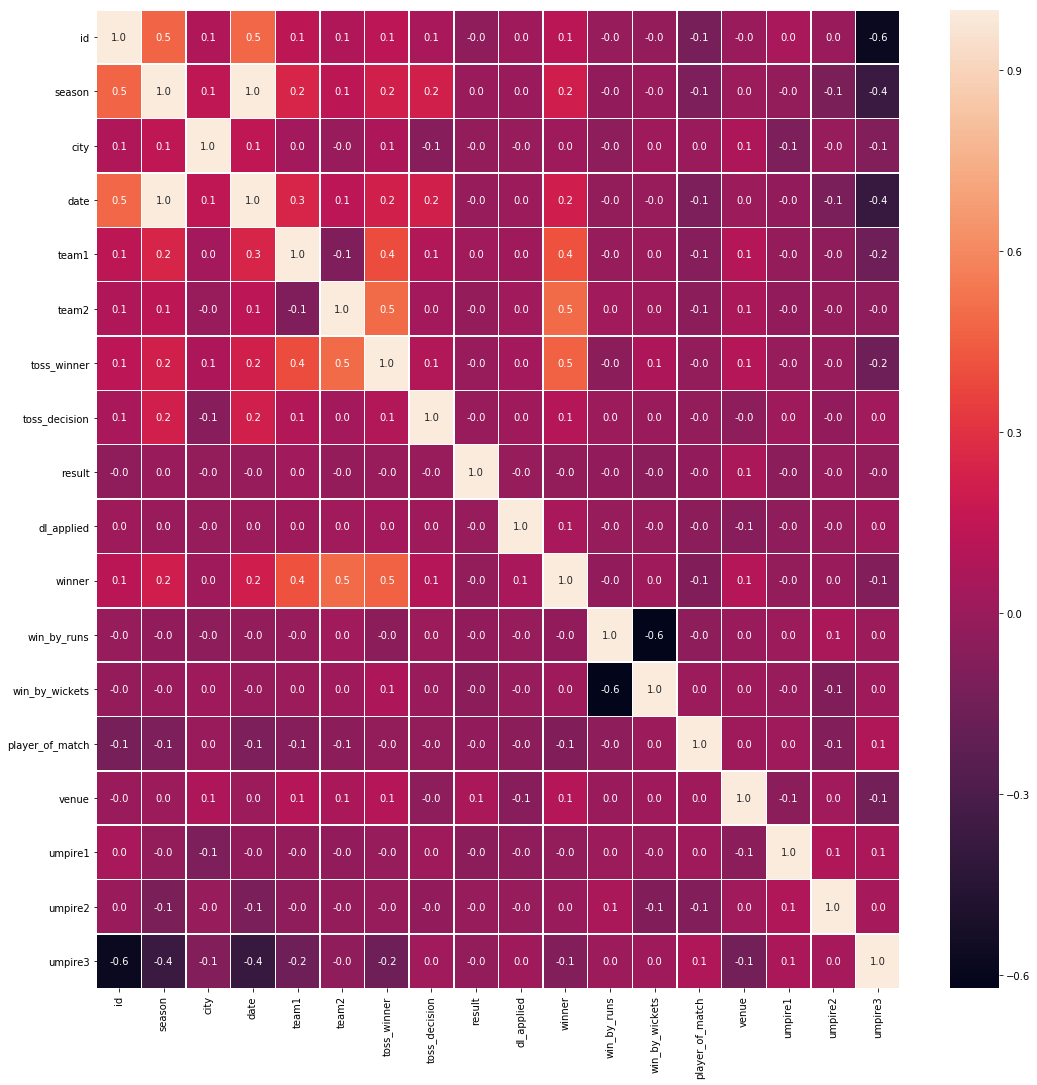

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) 

In [11]:
df1.head()

id  season  city  date  team1  team2  toss_winner  toss_decision  result  \
0   0       9    13   407     13     12           12              1       1   
1   1       9    24   408      7     10           10              1       1   
2   2       9    26   409      3      6            6              1       1   
3   3       9    14   410     10      4            4              1       1   
4   4       9     2   410     12      2           12              0       1   

   dl_applied  winner  win_by_runs  win_by_wickets  player_of_match  venue  \
0           0      13           35               0              199     23   
1           0      10            0               7              176     16   
2           0       6            0              10               30     25   
3           0       4            0               6               56     11   
4           0      12           15               0               84     14   

   umpire1  umpire2  umpire3  
0        5       23        0  
1        1       33      418  
2       27       11      419  
3        2        9      420  
4       44       45      421

In [12]:
df1 = df1.drop(['id'],axis=1)

In [13]:
df1.head()

season  city  date  team1  team2  toss_winner  toss_decision  result  \
0       9    13   407     13     12           12              1       1   
1       9    24   408      7     10           10              1       1   
2       9    26   409      3      6            6              1       1   
3       9    14   410     10      4            4              1       1   
4       9     2   410     12      2           12              0       1   

   dl_applied  winner  win_by_runs  win_by_wickets  player_of_match  venue  \
0           0      13           35               0              199     23   
1           0      10            0               7              176     16   
2           0       6            0              10               30     25   
3           0       4            0               6               56     11   
4           0      12           15               0               84     14   

   umpire1  umpire2  umpire3  
0        5       23        0  
1        1       33      418  
2       27       11      419  
3        2        9      420  
4       44       45      421

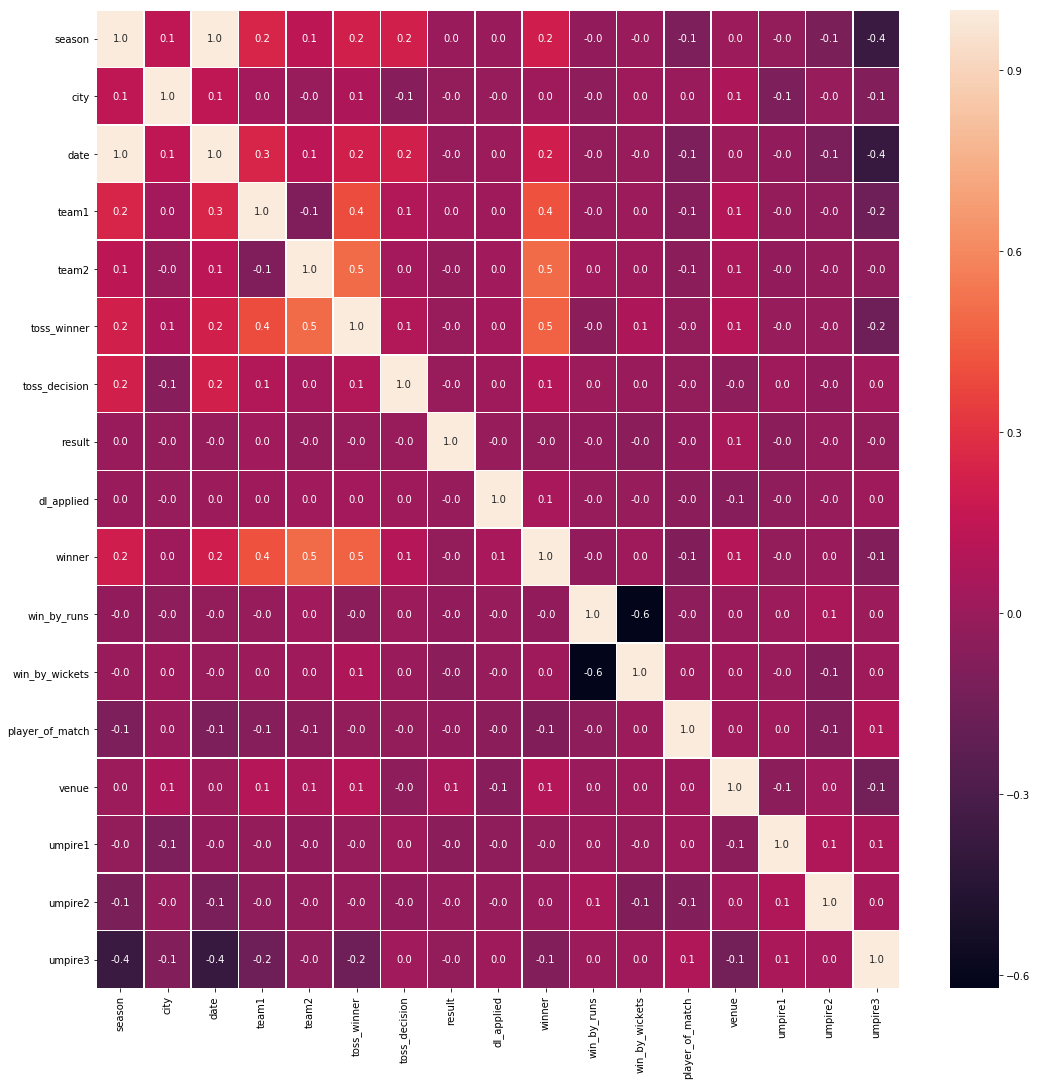

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) 

In [15]:
df1 = df1.drop(['umpire2'],axis=1)
df1 = df1.drop(['umpire1'],axis=1)

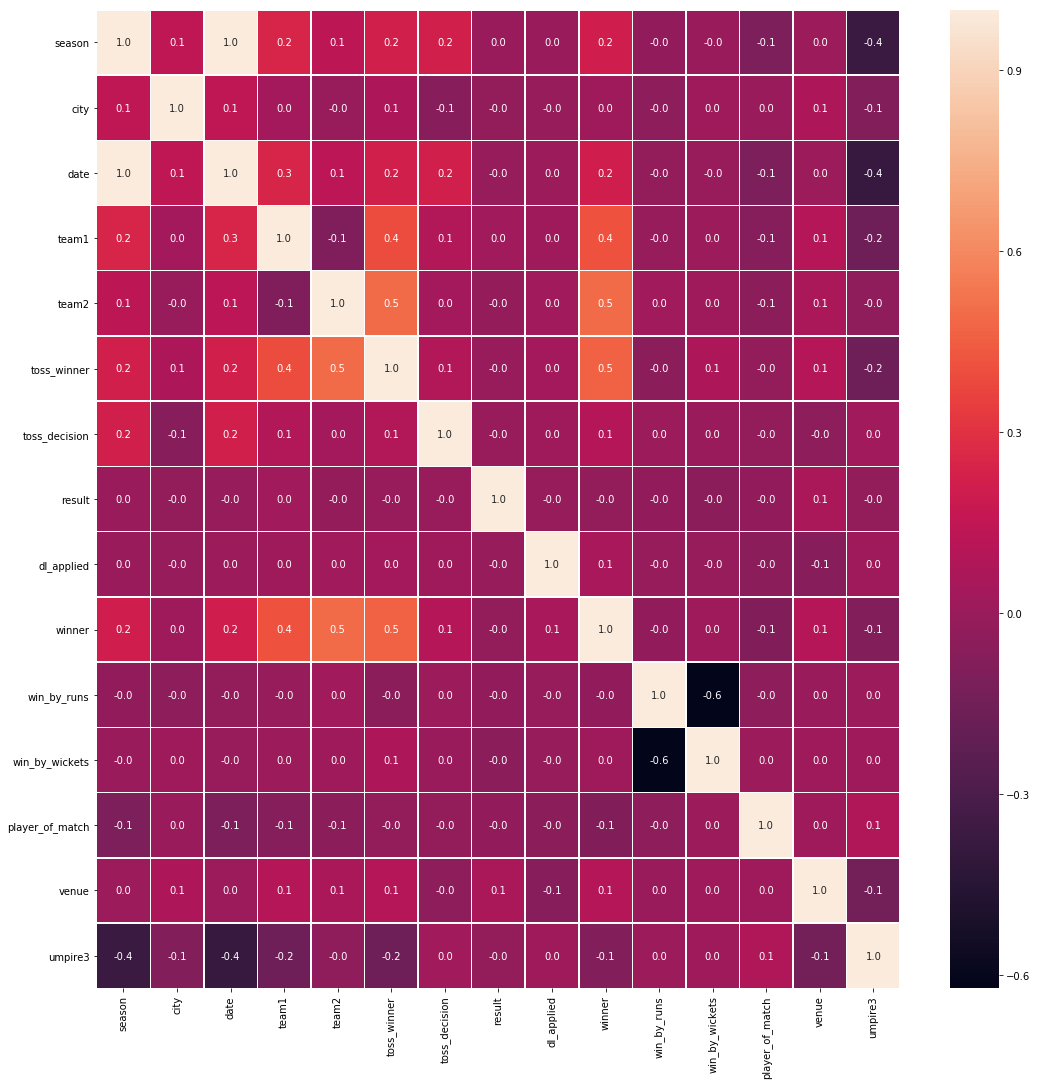

In [16]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) 

In [17]:
# Create Features and Labels Splits

In [18]:
X= df1.drop(['winner'], axis = 1)

X.head()

season  city  date  team1  team2  toss_winner  toss_decision  result  \
0       9    13   407     13     12           12              1       1   
1       9    24   408      7     10           10              1       1   
2       9    26   409      3      6            6              1       1   
3       9    14   410     10      4            4              1       1   
4       9     2   410     12      2           12              0       1   

   dl_applied  win_by_runs  win_by_wickets  player_of_match  venue  umpire3  
0           0           35               0              199     23        0  
1           0            0               7              176     16      418  
2           0            0              10               30     25      419  
3           0            0               6               56     11      420  
4           0           15               0               84     14      421

In [19]:
y = df1['winner']
y.head()

0    13
1    10
2     6
3     4
4    12
Name: winner, dtype: int64

In [20]:
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Random Forest:",RandomForestClassifier()))

models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


In [21]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=4, random_state=0)
    cv_result = cross_val_score(model,X,y.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 25.786163522
K-Nearest Neighbour: 13.2075471698
Decision Tree: 83.1761006289
Random Forest: 63.5220125786
GradientBoostingClassifier: 91.1949685535


In [22]:
#Visualization

In [23]:
df_matches_2008 = df[df['season']==2008]
df_matches_2009 = df[df['season']==2009]
df_matches_2010 = df[df['season']==2010]
df_matches_2011 = df[df['season']==2011]
df_matches_2012 = df[df['season']==2012]
df_matches_2013 = df[df['season']==2013]
df_matches_2014 = df[df['season']==2014]
df_matches_2015 = df[df['season']==2015]
df_matches_2016 = df[df['season']==2016]

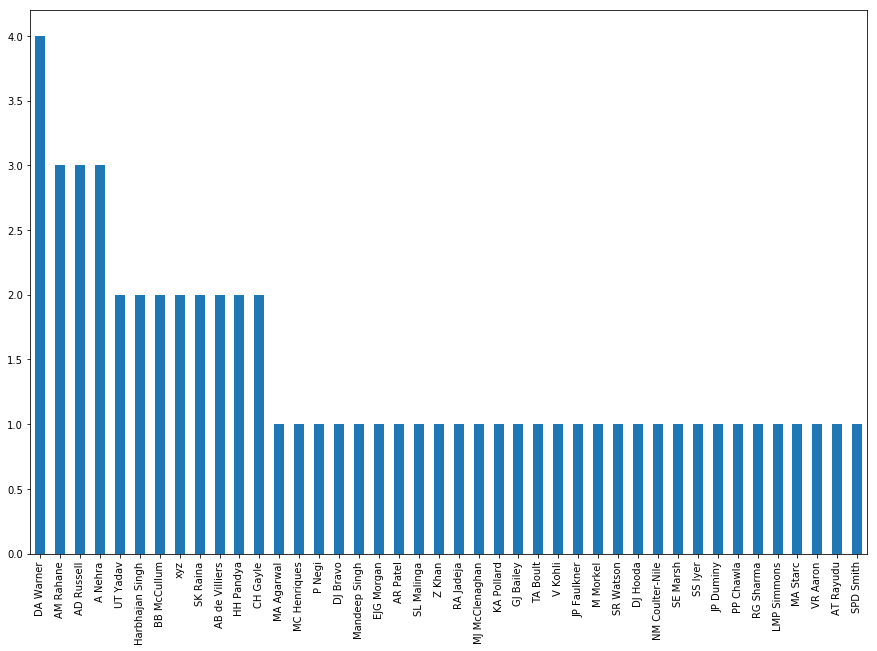

In [24]:
df_matches_2015['player_of_match'].value_counts().plot(kind='bar',figsize=(15,10))

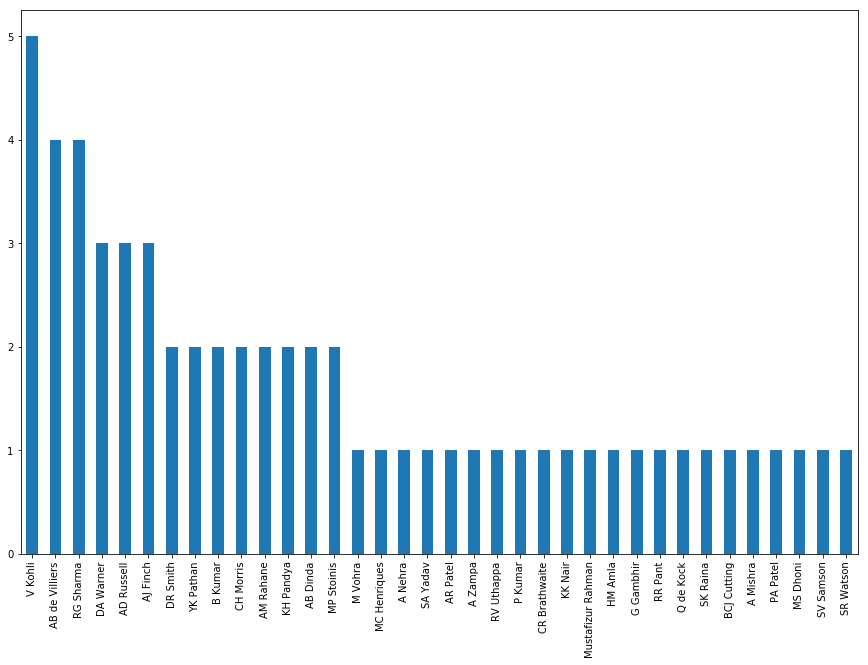

In [25]:
df_matches_2016['player_of_match'].value_counts().plot(kind='bar',figsize=(15,10))

In [26]:
#number of Wins based on Toss

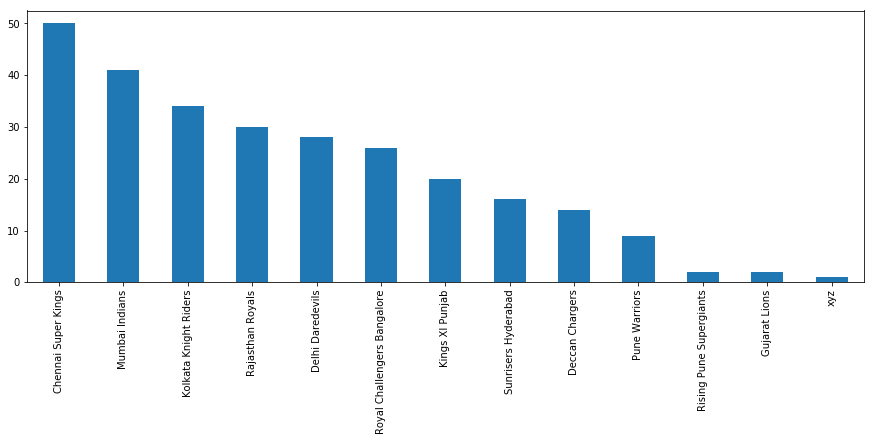

In [27]:
df[df['toss_decision'] == 'bat']['winner'].value_counts().plot(kind='bar',figsize=(15,5))

In [28]:
#Visualising the scenario in which the team won both the toss and match


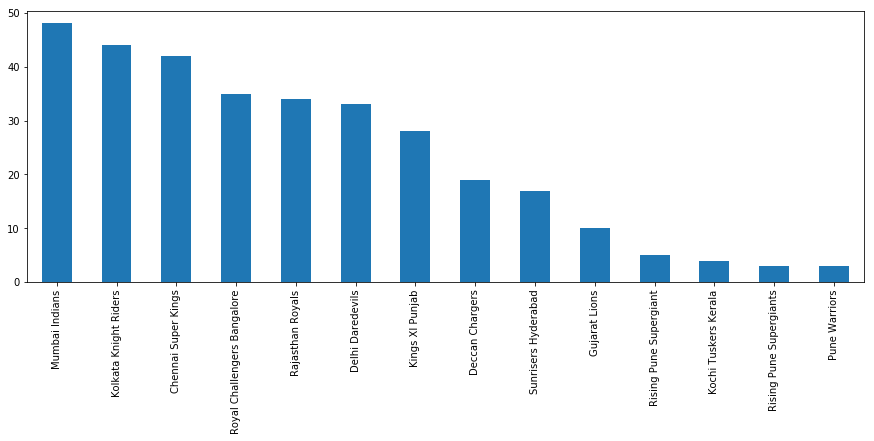

In [29]:
df[df['toss_winner']==df['winner']]['winner'].value_counts().plot(kind='bar',figsize=(15,5))

In [30]:
#number of wins for a team

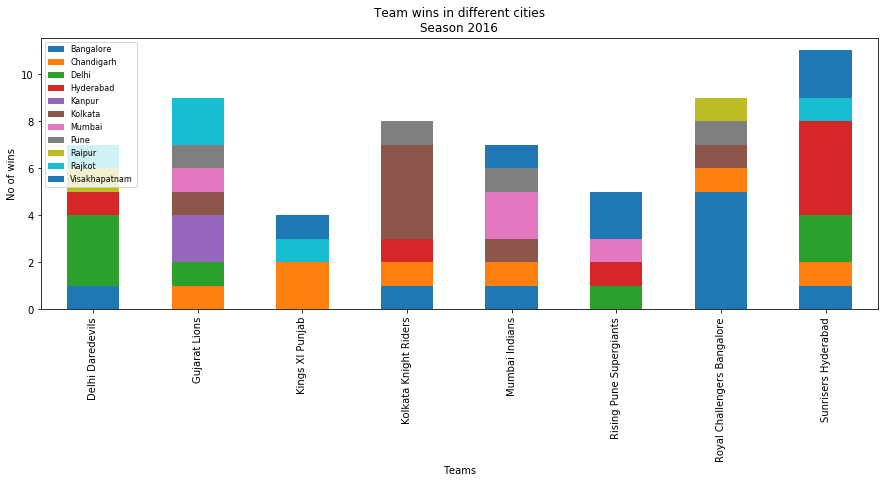

In [31]:
wins_percity = df_matches_2016.groupby(['winner', 'city'])['id'].count().unstack()
plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(2016), figsize=(15, 5))
sns.set_palette("Paired", len(df_matches_2016['city'].unique()))
plot.set_xlabel("Teams")
plot.set_ylabel("No of wins")
plot.legend(loc='best', prop={'size':8})
#output is showing that playing at hometown gives some advantage may be due to support from fans (Royal Cahllengers Bangalore)

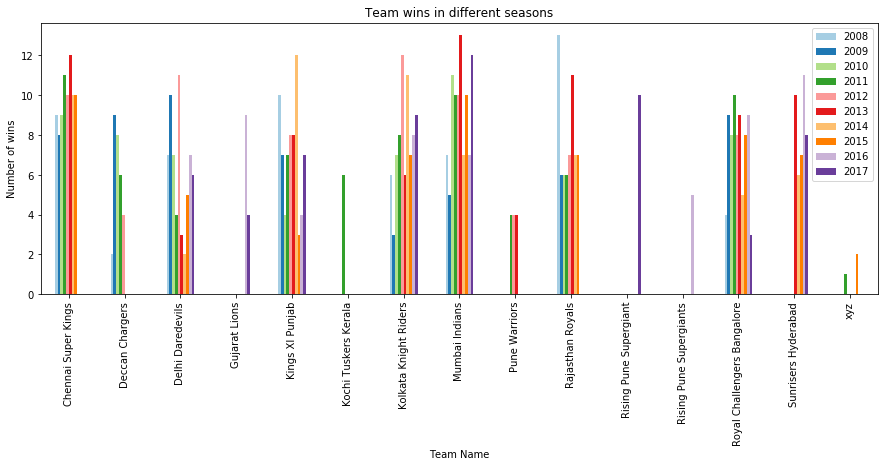

In [32]:
# we can see that chennai super kings won decent number of matches every season
# There is high variance in the other team wins which played more than one season except pune warriors who performed
# poorly in all the seasons
plot = df.groupby(['winner','season'])['id'].count().unstack().plot(kind='bar',
                                                                     figsize=(15,5),
                                                                     title='Team wins in different seasons')
sns.set_palette("Paired", len(df['id'].unique()))
plot.set_xlabel('Team Name')
plot.set_ylabel('Number of wins')
plot.legend(loc='best')



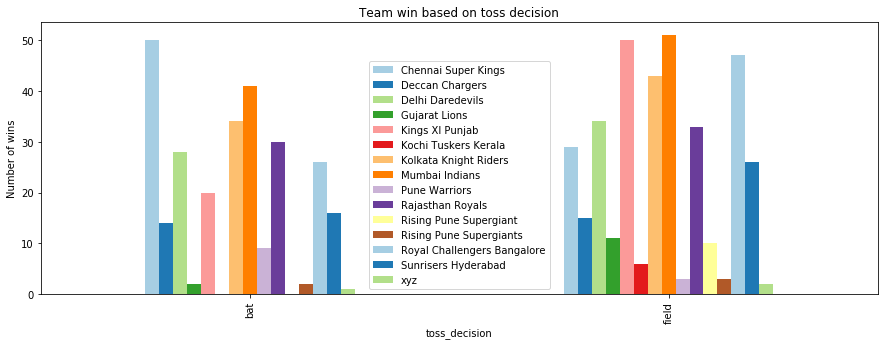

In [33]:
plot =df.groupby(['toss_decision','winner'])['id'].count().unstack().plot(kind='bar',
                                                                                  title='Team win based on toss decision',figsize=(15,5))
plot.set_ylabel('Number of wins')
plot.legend(loc='best')


# we can tell that Royal challengers and Kings XI punjab are good at chasing 
# chennai super kings are good at defending the score rather than chasing
# kkr,MI,RR are better at both chasing and defending